In [64]:
import random

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model

import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import os

In [3]:
encoder = LabelEncoder()
data = pd.read_csv('labels.csv')
encoder.fit(data['label'])

LabelEncoder()

In [4]:
classes = list(encoder.classes_)
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [5]:
label = encoder.transform(data['label'])
label

array([6, 9, 9, ..., 9, 1, 1])

In [7]:
folder = r'train'
IMG_SIZE = 32
images = []
for img in range(1,50001,1):
    img = str(img)
    img_path = os.path.join(folder, img + '.png')
    img_arr = cv2.imread(img_path)
    img_arr = cv2.cvtColor(img_arr,cv2.COLOR_BGR2RGB)
    img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
    images.append(img_arr)


In [8]:
print(len(images))

50000


In [9]:
x_data = np.array(images)
x_data

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [10]:
y_data = np.array(label)

In [11]:
x_data = x_data/255

In [12]:
x_data.shape

(50000, 32, 32, 3)

In [13]:
x_data


array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [14]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu, input_shape=(IMG_SIZE,IMG_SIZE,3)),
                            tf.keras.layers.MaxPooling2D((2,2), strides=2),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(128, activation=tf.nn.relu),
                            tf.keras.layers.Dense(128, activation=tf.nn.relu),
                            tf.keras.layers.Dense(128, activation=tf.nn.relu),
                            tf.keras.layers.Dense(128, activation=tf.nn.relu),
                            tf.keras.layers.Dense(10, activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2097280   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1

In [15]:
tb_callback = tf.keras.callbacks.TensorBoard(log_dir='logs/',histogram_freq=1)

In [16]:
cp_callback = tf.keras.callbacks.ModelCheckpoint('cp.ckpt', save_weights_only=True,verbose=1)

In [17]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
              metrics=['accuracy'])
model.fit(x_data, y_data, epochs=10, batch_size=32,validation_split=0.2, callbacks=[tb_callback, cp_callback])

Epoch 1/10
1250/1250 [==============================] - 39s 30ms/step - loss: 1.4942 - accuracy: 0.4542 - val_loss: 1.2755 - val_accuracy: 0.5505

Epoch 00001: saving model to cp.ckpt
Epoch 2/10
1250/1250 [==============================] - 36s 29ms/step - loss: 1.1593 - accuracy: 0.5868 - val_loss: 1.1689 - val_accuracy: 0.5836

Epoch 00002: saving model to cp.ckpt
Epoch 3/10
1250/1250 [==============================] - 36s 29ms/step - loss: 0.9969 - accuracy: 0.6469 - val_loss: 1.0810 - val_accuracy: 0.6259

Epoch 00003: saving model to cp.ckpt
Epoch 4/10
1250/1250 [==============================] - 37s 30ms/step - loss: 0.8758 - accuracy: 0.6909 - val_loss: 1.0640 - val_accuracy: 0.6343

Epoch 00004: saving model to cp.ckpt
Epoch 5/10
1250/1250 [==============================] - 37s 30ms/step - loss: 0.7744 - accuracy: 0.7276 - val_loss: 1.1300 - val_accuracy: 0.6313

Epoch 00005: saving model to cp.ckpt
Epoch 6/10
1250/1250 [==============================] - 36s 29ms/step - loss: 0.

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

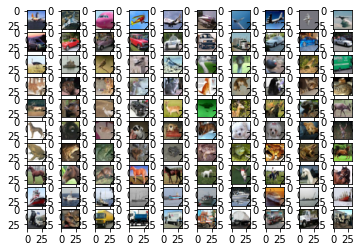

In [96]:
e=0
for k in range(0,10):
    j=0
    while j<10:
        i = random.randint(1,50000)
        class_ = np.argmax(model.predict(x_data[i:i+1]))
        if class_== k: 
            e=e+1
            j=j+1
            plt.subplot(10,10,e)
            plt.imshow(x_data[i])